<a href="https://colab.research.google.com/github/Ankit-star/SVMClassifier/blob/main/SVMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_excel("/content/default of credit card clients.xls")

In [ ]:
df2 = df1.to_csv("/content/default of credit card clients.csv")

In [ ]:
df = pd.read_csv("/content/default of credit card clients.csv",header=1)

In [ ]:
df.head()

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.rename({'default payment next month':'Default'},axis=1,inplace=True)

In [ ]:
df.head()

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.drop('0',axis=1,inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
Default      int64
dtype: object

In [ ]:
df['SEX'].unique()

array([2, 1])

In [ ]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [ ]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

In [ ]:
len(df)

30000

In [ ]:
df_nomissing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
len(df_nomissing)

29932

In [ ]:
df_no_default = df_nomissing[df_nomissing['Default']==0]
df_default = df_nomissing[df_nomissing['Default']!=0]


In [ ]:
len(df_default)


6631

In [ ]:
len(df_no_default)

23301

In [ ]:
from sklearn.utils import resample

In [ ]:
df_no_default_downsampled=resample(df_no_default,replace=False,n_samples=1000,random_state= 42)
len(df_no_default_downsampled)

1000

In [ ]:
df_default_downsampled=resample(df_default,replace=False,n_samples=1000,random_state= 42)
len(df_default_downsampled)

1000

In [ ]:
df_downsample = pd.concat([df_no_default_downsampled,df_default_downsampled])
len(df_downsample)

2000

*Format Data : Splitting the Data *

In [ ]:
X = df_downsample.drop('Default',axis=1).copy()
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,642,130000,2,3,1,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0
4678,4679,170000,1,3,1,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,16005,180000,2,2,1,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,22975,210000,2,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0
17535,17536,190000,2,3,1,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [ ]:
y = df_downsample['Default'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: Default, dtype: int64

***One-Hot Encoding***


In [ ]:
X_encoded = pd.get_dummies(X,columns=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4',
                                         'PAY_5','PAY_6'])
X_encoded.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,...,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_7,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,642,130000,28,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4678,4679,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16004,16005,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22974,22975,210000,32,355,975,410,0,0,0,979,412,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17535,17536,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


***Centering and Scaling***

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from sklearn.decomposition import PCA

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)


***Building A Supprt Vector Machine***

In [ ]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

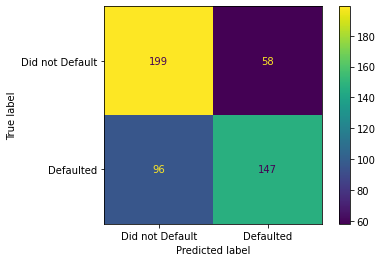

In [ ]:
plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',
                                                         display_labels=["Did not Default", "Defaulted"])

In [ ]:
param_grid = [{
    'C':[0.5,1,0.1,1,10,100],
    'gamma': ['scale',1,0.1,0.01,0.001,0.0001],
    'kernel': ['rbf']},
]


In [ ]:
optimal_params=GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)
optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
clf_svm=SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

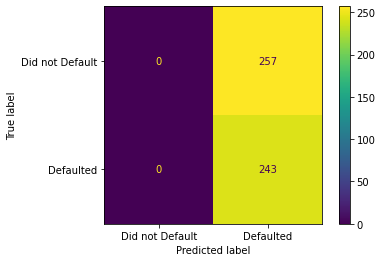

In [ ]:
plot_confusion_matrix(clf_svm,X_test_scaled,y_test,values_format='d',
                                                         display_labels=["Did not Default", "Defaulted"])

In [ ]:
len(df_downsample.columns)

25

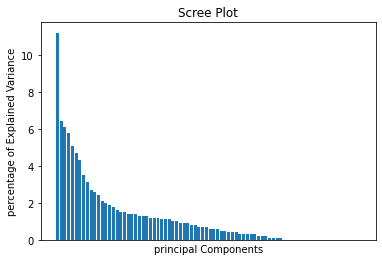

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False
)
plt.ylabel("percentage of Explained Variance")
plt.xlabel("principal Components")
plt.title("Scree Plot")
plt.show()

In [ ]:
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords,train_pc2_coords)))

param_grid = [{
    'C':[0.5,1,0.1,1,10,100],
    'gamma': ['scale',1,0.1,0.01,0.001,0.0001],
    'kernel': ['rbf']},
]

optimal_params=GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)
optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
clf_svm=SVC(random_state=42,C=100,gamma=0.001)
clf_svm.fit(pca_train_scaled,y_train)

X_test_pca =pca.transform(X_test_scaled)

test_pc1_coords = X_test_pca[:,0]
test_pc2_coords = X_test_pca[:,1]

x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1

y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1

xx,yy = np.meshgrid(np.arange(start = x_min,stop = x_max,step = 0.1),
                    np.arange(start = y_min,stop = y_max,step = 0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(),yy.ravel())))

Z = Z.reshape(xx,yy,Z)

cmap = colors.ListedColormap({'#e41a1c','#4daf4a'})

scatter = ax.scatter(test_pc1_coords,test_pc2_coords,c=y_train,
                     cmap = cmap,
                     s=100,
                     edgecolors='k',
                     alpha = 0.7)

legend = ax.legend(scatter.legend_elements()[0],
                   scatter.legend_elements()[1],
                   loc = 'upper right')

legent.get_texts()[0].set_test('No Default')
legent.get_texts()[1].set_test('Yes Default')

ax.set_ylabel('pc2')
ax.set_xlabel('pc1')
ax.set_title('Decision surface using the PCA transformed features')

plt.show()

TypeError: ignored